# Monte Carlo Analysis in Python

Demonstration of using pandas to analyze Monte Carlo output from MCSim

This notebook covers the following:

* pandas dataframes
* quantiles

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [27]:
fpath = '/home/qcpt/PBPK-workshop/Day2_AM/Model/four_cmpt_MC.out'
df = pd.read_csv(fpath, sep='\t')
print(df.shape)

(10000, 486)


In [33]:
tfinal = 24
tstep = 0.1
ind_initial = 1
ind_final = int(tfinal/tstep + 1)
blood_df = df.ix[:, 'CBL_mgL_1.{0}'.format(ind_initial):'CBL_mgL_1.{0}'.format(ind_final)]
print(blood_df.shape)

(10000, 241)


## Calculate prediction intervals

In [34]:
p_interval= blood_df.quantile(q=[0.025, 0.5, 0.975], axis=0)

## Plot prediction intervals

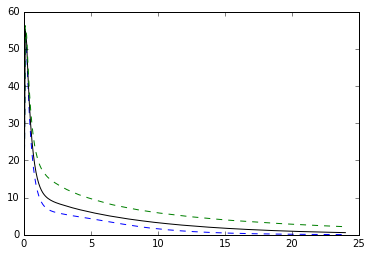

In [35]:
time = np.arange(0, tfinal+tstep, tstep)
plt.plot(time, p_interval.ix[0.025, :], 'b--')
plt.plot(time, p_interval.ix[0.500, :], 'k')
plt.plot(time, p_interval.ix[0.975, :], 'g--')

## Plot multiple compartments

KeyError: 'CH_mgL_1.1'

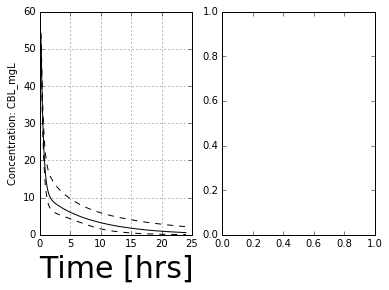

In [32]:
concs = ['CBL_mgL', 'CH_mgL']
fig, ax = plt.subplots(1,2)
for i,c in enumerate(concs):
    conc_df = df.ix[:, '{0}_1.{1}'.format(c, ind_initial) : '{0}_1.{1}'.format(c, ind_final)]
    p_df = conc_df.quantile([0.025, 0.5, 0.975], axis=0)
    ax[i].plot(time, p_df.ix[0.025, :], 'k--')
    ax[i].plot(time, p_df.ix[0.500, :], 'k')
    ax[i].plot(time, p_df.ix[0.975, :], 'k--')
    
    ax[i].set_xlabel('Time [hrs]', fontsize=30)
    ax[i].set_ylabel('Concentration: {0}'.format(c))
    ax[i].grid()
plt.tight_layout()

In [13]:
print(df.columns[:5])

Index(['Iter', 'QCC', 'VKC', 'VHC', 'CBL_mgL_1.1'], dtype='object')


In [39]:
pearson = df.corr('pearson')
print(pearson)

                  Iter       VKC       CLC        k1  CBL_mgL_1.1  \
Iter          1.000000 -0.017099 -0.003064  0.002841          NaN   
VKC          -0.017099  1.000000 -0.019105  0.011916          NaN   
CLC          -0.003064 -0.019105  1.000000  0.017800          NaN   
k1            0.002841  0.011916  0.017800  1.000000          NaN   
CBL_mgL_1.1        NaN       NaN       NaN       NaN          NaN   
CBL_mgL_1.2  -0.001201 -0.132551 -0.015829 -0.992076          NaN   
CBL_mgL_1.3   0.000659 -0.261494 -0.014426 -0.965675          NaN   
CBL_mgL_1.4   0.002592 -0.387346 -0.013988 -0.920592          NaN   
CBL_mgL_1.5   0.004408 -0.498321 -0.014767 -0.862684          NaN   
CBL_mgL_1.6   0.006025 -0.590327 -0.016799 -0.799093          NaN   
CBL_mgL_1.7   0.007409 -0.663585 -0.019995 -0.735819          NaN   
CBL_mgL_1.8   0.008571 -0.720378 -0.024235 -0.676918          NaN   
CBL_mgL_1.9   0.009538 -0.763676 -0.029395 -0.624582          NaN   
CBL_mgL_1.10  0.010341 -0.796352 -

In [24]:
print(pearson.columns[:5])

Index(['Iter', 'VKC', 'CLC', 'k1', 'CBL_mgL_1.1'], dtype='object')


In [ ]:
plt.plot(time, pearson.ix['VKC','CK_mgL_1.1':'CK_mgL_1.241'], label='VKC')
plt.plot(time, pearson.ix['CLC','CK_mgL_1.1':'CK_mgL_1.241'], label='CLC')
plt.plot(time, pearson.ix['k1','CK_mgL_1.1':'CK_mgL_1.241'], label='k1')
plt.legend(loc='best')